In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
comm_attri = pd.read_excel("commAttri.xlsx", index_col = 0, encoding = "UTF-8") # 读取爬取的数据
comm_attri.head()

,minTime,Ncmts,prodName,category,itemTagList,promTag,productPlace,price
itemId,,,,,,,,
1006001,2015-11-05,50893,日式多功能颈枕 针织款,居家,爆品,NaN,NaN,69.0
1006051,2015-12-17,59030,2条装 轻柔无捻毛巾 - 轻软亲肤，热销50万条,洗护,NaN,NaN,NaN,59.0
1006058,2015-11-16,60783,懒人抹布 - 吸水吸油，热销200万卷,餐厨,满折,NaN,NaN,13.2
1021000,2016-03-23,47766,埃及进口长绒棉毛巾 - 厚实大毛圈，干爽瞬吸,洗护,满额减,NaN,NaN,32.0
1021020,2016-05-06,68734,2条装 男式基础平角内裤,服装,NaN,NaN,NaN,47.2


<font size=4, face="Calibri">
<font color = red>commAttri.xlsx 商品属性<br/></font>
   itemId：商品ID<br/>
	minTime：商品评价的最早生成日期<br/>
	Ncmts：抓取数据时刻，商品的评价总量<br/>
	prodName：商品名称<br/>
	category：商品类别<br/>
	itemTagList：商品标签<br/>
	promTag：抓取数据时刻，商品的促销标签<br/>
	productPlace：商品产品标签<br/>
	price：抓取数据时刻，商品的标价
</font>

In [3]:
len(comm_attri)

2916

In [4]:
comm_cat =  comm_attri.groupby('category')[['prodName']].count()
comm_cat.columns = ['number']
print('The number of items of each category:')
comm_cat

The number of items of each category:


,number
category,
婴童,292
居家,393
文体,547
服装,253
洗护,175
特色区,285
电器,169
鞋包配饰,285
餐厨,169


In [5]:
comm_cat.sort_values(by = ['number'], ascending = False)

,number
category,
文体,547
居家,393
饮食,348
婴童,292
特色区,285
鞋包配饰,285
服装,253
洗护,175
电器,169


In [12]:
comm_attri.groupby('category')[['price','Ncmts']].describe()

price                                                                \
          count        mean          std   min    25%    50%     75%      max   
category                                                                        
婴童        292.0  141.435274   185.442828   4.9  58.75   99.0  140.75   1799.0   
居家        393.0  692.534860  1445.694666   9.9  49.00  119.0  459.00  11999.0   
文体        547.0  140.278062   229.330334   3.9  49.00   89.0  149.00   2999.0   
服装        253.0  187.503953   148.527030  19.9  89.00  169.0  229.00   1299.0   
洗护        175.0   75.428000    78.546135   4.9  24.95   49.9   99.00    520.0   
特色区       285.0  304.234596   962.991753   9.9  49.00  108.0  206.00  11999.0   
电器        169.0  283.396213   500.111828  12.9  59.00  129.0  269.00   4680.0   
鞋包配饰      285.0  225.302456   172.811858   9.0  99.00  209.0  299.00   1399.0   
餐厨        169.0  134.647929   165.511695   6.9  39.00   79.0  159.00   1199.0   
饮食        348.0  109.183333   319.396865   6.0  18.00   28.0   90.65   3968.0   

          Ncmts                                                           \
          count         mean           std   min     25%     50%     75%   
category                                                                   
婴童        292.0  1376.647260   4751.228235  10.0  187.75   459.0  1254.5   
居家        393.0  2760.091603   5324.809920  10.0  186.00   778.0  3440.0   
文体        547.0   571.926874   2428.453247   2.0   11.00    32.0    95.0   
服装        253.0  4263.059289   8603.768178  21.0  460.00  1456.0  4192.0   
洗护        175.0  6090.337143  11528.333807  23.0  486.50  2282.0  6086.0   
特色区       285.0  1883.628070   3410.891373  23.0  216.00   539.0  2043.0   
电器        169.0  3927.171598   8904.603928  19.0  353.00  1378.0  3670.0   
鞋包配饰      285.0  5256.014035  13024.851365  18.0  505.00  1976.0  5180.0   
餐厨        169.0  4743.958580   9414.247579   7.0  337.00  1460.0  5309.0   
饮食        348.0  5465.614943   8317.099361   4.0  573.50  2556.0  7222.5   

                    
               max  
category            
婴童         75544.0  
居家         58515.0  
文体         25601.0  
服装         76030.0  
洗护         72884.0  
特色区        29012.0  
电器         95177.0  
鞋包配饰      183683.0  
餐厨         81015.0  
饮食         66913.0

In [10]:
comm_attri.groupby('category')[['price','Ncmts']].skew()

,price,Ncmts
category,,
婴童,4.693681,13.389469
居家,3.643328,5.682487
文体,7.006456,7.455691
服装,2.944097,5.195717
洗护,2.561307,3.620937
特色区,8.830105,4.384694
电器,5.363312,7.102522
鞋包配饰,2.097188,9.716253
餐厨,3.083837,4.985024


In [11]:
comm_attri.groupby('category')[['price','Ncmts']].apply(lambda x: x.kurt())

,price,Ncmts
category,,
婴童,29.872041,205.795224
居家,16.767066,48.135075
文体,66.545165,63.922860
服装,14.766170,34.788859
洗护,8.786448,14.477820
特色区,92.439028,25.878898
电器,38.594787,66.716489
鞋包配饰,9.540970,125.322166
餐厨,12.906447,32.710797


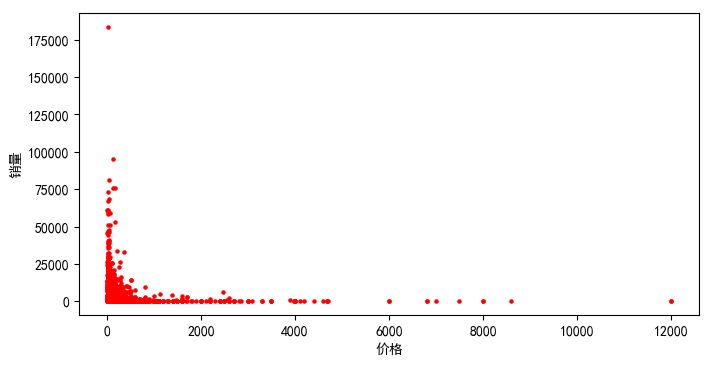

In [13]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8,4), dpi=100)
ax.scatter(comm_attri['price'], comm_attri['Ncmts'], s=5, color='red')
ax.set_xlabel('价格')
ax.set_ylabel('销量')
# ax.set_title('价格对销量的影响')
plt.show()

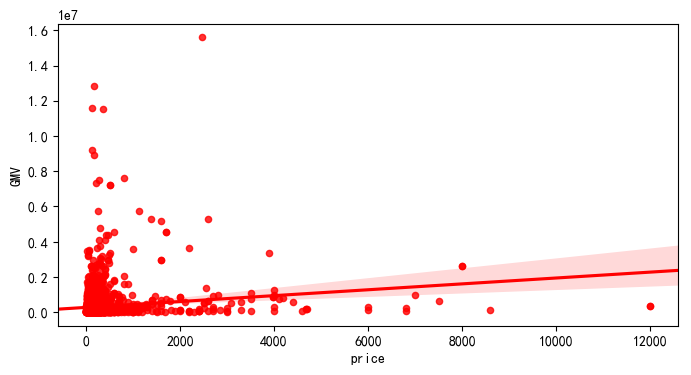

In [14]:
comm_attri['GMV'] = comm_attri['Ncmts'] * comm_attri['price']

fig, ax = plt.subplots(figsize=(8,4), dpi=100)
sns.regplot(x = 'price', y = 'GMV', data = comm_attri, color = 'red', scatter_kws={'s': 20})

In [15]:
import jieba

# 导入整理好的待添加词语
# add_words = pd.read_excel('add_words.xlsx')
# add_words = add_words.values.tolist()
# add_words = [i for item in add_words for i in item]

add_words = ['果粒',
 '抱枕',
 '颈枕',
 '擦手球',
 '登机箱',
 'Type-C',
 '手机膜',
 '手机壳',
 '水性笔',
 '墨囊',
 '收纳箱',
 '收纳包',
 '洗杯刷',
 '打底衫',
 '七分裤',
 '九分裤',
 '雪地靴',
 '抹茶',
 '拿铁',
 '牛轧饼',
 '猪肉脯',
 '网易云音乐',
 '守望先锋',
 '炉石传说',
 '春风TryFu',
 '苦力怕',
 '可替换',
 '掉毛率',
 '不掉屑',
 '不发霉',
 '少油烟',
 '吸水力',
 '少划痕',
 '除螨',
 'V领',
 'T型',
 '省电',
 '不伤眼',
 '无积墨',
 '不伤手',
 '手撕',
 '无束缚',
 '无频闪',
 '不占空间',
 '不尴尬',
 '黑科技',
 '黑猪肉',
 '干红',
 '干白',
 '葡萄酒',
 '芒果干',
 '桂圆干',
 '龙眼干',
 '干湿两用']

# 添加词语
for w in add_words:
    jieba.add_word(w)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\陈方舟\AppData\Local\Temp\jieba.cache
Loading model cost 2.666 seconds.
Prefix dict has been built successfully.


In [16]:
title = comm_attri.prodName.values.tolist()

title_s = []
for line in title:
    title_cut = jieba.lcut(line)
    title_s.append(title_cut)

In [17]:
# 导入停用词表
# stop_words = pd.read_excel('stopwords.xlsx')
# stop_words = stop_words.values.tolist()
stop_words = ['一些',
 '一何',
 '一切',
 '一则',
 '一样',
 '一般',
 '上',
 '上下',
 '下',
 '不',
 '不是',
 '不比',
 '不问',
 '与',
 '且',
 '两者',
 '个',
 '个别',
 '临',
 '为',
 '为了',
 '为着',
 '乃',
 '么',
 '之',
 '之一',
 '之类',
 '乎',
 '乘',
 '也',
 '了',
 '于',
 '于是',
 '些',
 '亦',
 '人',
 '人们',
 '人家',
 '什么',
 '今',
 '介于',
 '仍',
 '从',
 '从此',
 '从而',
 '他',
 '他人',
 '他们',
 '以',
 '以上',
 '以为',
 '们',
 '任',
 '任何',
 '任凭',
 '似的',
 '但',
 '但凡',
 '但是',
 '何',
 '何以',
 '何处',
 '何时',
 '作为',
 '你',
 '你们',
 '使',
 '使得',
 '例如',
 '依',
 '便于',
 '俺',
 '俺们',
 '倘',
 '借',
 '像',
 '儿',
 '光是',
 '全体',
 '全部',
 '兮',
 '其',
 '其一',
 '其中',
 '其二',
 '其他',
 '其余',
 '其它',
 '其次',
 '兼之',
 '内',
 '再',
 '冒',
 '冲',
 '几',
 '几时',
 '凡',
 '凭',
 '凭借',
 '出于',
 '出来',
 '分别',
 '则',
 '别',
 '别人',
 '别处',
 '别的',
 '到',
 '前后',
 '前此',
 '前者',
 '加之',
 '加以',
 '即',
 '却',
 '去',
 '又',
 '又及',
 '及',
 '及其',
 '及至',
 '受到',
 '另',
 '另外',
 '只',
 '只限',
 '叫',
 '叮咚',
 '可',
 '可以',
 '可是',
 '可见',
 '各',
 '各个',
 '各位',
 '各种',
 '各自',
 '同',
 '后',
 '后者',
 '向',
 '向着',
 '吓',
 '吗',
 '否则',
 '吧',
 '吧哒',
 '吱',
 '呀',
 '呃',
 '呕',
 '呗',
 '呜',
 '呜呼',
 '呢',
 '呵',
 '呵呵',
 '呸',
 '呼哧',
 '咋',
 '和',
 '咚',
 '咦',
 '咧',
 '咱',
 '咱们',
 '咳',
 '哇',
 '哈',
 '哈哈',
 '哉',
 '哎',
 '哎呀',
 '哎哟',
 '哗',
 '哟',
 '哦',
 '哩',
 '哪',
 '哪个',
 '哼',
 '哼唷',
 '唉',
 '唯有',
 '啊',
 '啐',
 '啥',
 '啦',
 '啪达',
 '啷当',
 '喂',
 '喏',
 '喔唷',
 '喽',
 '嗡',
 '嗡嗡',
 '嗬',
 '嗯',
 '嗳',
 '嘎',
 '嘎登',
 '嘘',
 '嘛',
 '嘻',
 '嘿',
 '嘿嘿',
 '因',
 '在',
 '在下',
 '在于',
 '地',
 '基于',
 '处在',
 '多',
 '多么',
 '多少',
 '大',
 '大家',
 '她',
 '她们',
 '好',
 '如',
 '如上',
 '如下',
 '如何',
 '如其',
 '如同',
 '如是',
 '始而',
 '孰料',
 '孰知',
 '宁',
 '它',
 '它们',
 '对',
 '对于',
 '对待',
 '对方',
 '对比',
 '将',
 '小',
 '尔',
 '就',
 '就是',
 '就算',
 '就要',
 '尽',
 '己',
 '已',
 '巴',
 '巴巴',
 '并',
 '并且',
 '并非',
 '开外',
 '开始',
 '归',
 '归齐',
 '当',
 '当地',
 '当然',
 '当着',
 '彼',
 '彼时',
 '彼此',
 '往',
 '待',
 '很',
 '得',
 '得了',
 '怎',
 '怎么',
 '您',
 '慢说',
 '我',
 '我们',
 '或',
 '或则',
 '或是',
 '或曰',
 '或者',
 '截至',
 '所',
 '所以',
 '所有',
 '才',
 '打',
 '打从',
 '把',
 '拿',
 '按',
 '按照',
 '据',
 '据此',
 '接着',
 '故',
 '旁人',
 '无',
 '既',
 '既往',
 '既是',
 '时候',
 '是',
 '是以',
 '是的',
 '曾',
 '替',
 '替代',
 '最',
 '有',
 '有些',
 '有关',
 '有及',
 '有时',
 '有的',
 '望',
 '朝',
 '朝着',
 '本',
 '本人',
 '本地',
 '本着',
 '本身',
 '来',
 '来着',
 '来自',
 '来说',
 '极了',
 '果然',
 '果真',
 '某',
 '某个',
 '某些',
 '某某',
 '根据',
 '正值',
 '正如',
 '正巧',
 '正是',
 '此',
 '此地',
 '此处',
 '此外',
 '此时',
 '此次',
 '此间',
 '每',
 '比',
 '比及',
 '比如',
 '比方',
 '沿',
 '沿着',
 '漫说',
 '然后',
 '照',
 '照着',
 '用',
 '用来',
 '由',
 '由于',
 '的',
 '的确',
 '的话',
 '直到',
 '省得',
 '看',
 '眨眼',
 '着',
 '着呢',
 '离',
 '第',
 '等',
 '等到',
 '等等',
 '管',
 '类如',
 '纵',
 '纵令',
 '纵使',
 '纵然',
 '经',
 '经过',
 '结果',
 '给',
 '者',
 '而',
 '而后',
 '而外',
 '而是',
 '能',
 '能否',
 '腾',
 '自',
 '自从',
 '自后',
 '自家',
 '自己',
 '自打',
 '自身',
 '至',
 '至于',
 '至今',
 '致',
 '般的',
 '若',
 '若是',
 '若果 ',
 '莫如',
 '莫若',
 '虽',
 '虽则',
 '虽然',
 '虽说',
 '被',
 '要',
 '要不',
 '要么',
 '要是',
 '让',
 '许多',
 '论',
 '该',
 '说来',
 '诸',
 '谁',
 '赶',
 '起',
 '趁',
 '距',
 '跟',
 '较',
 '较之',
 '边',
 '过',
 '还',
 '还是',
 '还有',
 '还要',
 '这',
 '这个',
 '这么',
 '遵循',
 '遵照',
 '那',
 '那个',
 '那么',
 '那些',
 '都',
 '阿',
 '除',
 '除了',
 '除外',
 '除非',
 '随',
 '随后',
 '随时',
 '非特',
 '非独',
 '靠',
 '顺',
 '顺着',
 '首先',
 '$',
 '?',
 '_',
 '“',
 '”',
 '、',
 '。',
 '《',
 '》',
 '！',
 '，',
 '：',
 '；',
 '？',
 '（',
 '）',
 '(',
 ')',
 '【',
 '】',
 ',',
 '+',
 '-',
 '*',
 '&',
 '/',
 '℃',
 '克',
 '网易',
 '严选',
 '制造',
 '智造',
 '世界',
 '系列',
 '装',
 '件',
 '款',
 '寸',
 '秒',
 '根据',
 '层',
 '套',
 '只',
 '枚',
 '年',
 '半年',
 '十年',
 '百年',
 '千年',
 '全年',
 '每天',
 '条装',
 '片装',
 '只装',
 '支装',
 '双装',
 '万条',
 '万根',
 '万卷',
 '袋入',
 '色',
 '式',
 '型',
 '级',
 '销量',
 '供应商',
 '仅售',
 '适用',
 '建议价',
 '建议',
 '掉',
 '屑',
 '螨',
 '零',
 '二',
 '三',
 '四',
 '五',
 '六',
 '七',
 '八',
 '九',
 '十',
 0,
 '1',
 2,
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 10,
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '32',
 '35',
 '43',
 50,
 55,
 56,
 60,
 75,
 80,
 100,
 110,
 118,
 128,
 130,
 135,
 140,
 142,
 150,
 158,
 160,
 168,
 170,
 180,
 184,
 185,
 192,
 200,
 220,
 '230',
 '233',
 260,
 268,
 280,
 300,
 304,
 316,
 360,
 418,
 450,
 '470',
 '500',
 520,
 '720',
 800,
 '2016',
 2800,
 0.03,
 0.4,
 '1.2',
 '1.35',
 '1.5',
 1.8,
 '2.0',
 '2.2',
 '2.3',
 12.6,
 '毫升',
 'cm',
 'mm',
 'm',
 '24cm',
 '30cm',
 '165cm',
 '300m',
 '350m',
 '50g',
 '180g',
 '227g',
 '1L',
 '11L',
 '5%',
 '40%',
 '56%',
 '100%',
 'Hi',
 'it',
 'go',
 'V',
 'T',
 'L',
 'No.11',
 'No.66']

# stop_words = [i for item in stop_words for i in item]

stop_words.append(' ')
stop_words.append('0')
stop_words.append('2')
stop_words.append('10')
stop_words.append('50')
stop_words.append('60')
stop_words.append('100')
stop_words.append('200')
stop_words.append('300')
stop_words.append('180')
stop_words.append('750')

# 删除停用词
title_clean = []
for line in title_s:
    line_clean = []
    for word in line:
        if word not in stop_words:
            line_clean.append(word)
    title_clean.append(line_clean)

In [18]:
# 去重
title_clean_dist = []
for line in title_clean:
    line_dist = []
    for word in line:
        if word not in line_dist:
            line_dist.append(word)
    title_clean_dist.append(line_dist)
    
# 将 title_clean_dist 转化为一个list: allwords_clean_dist
allwords_clean_dist = []
for line in title_clean_dist:
    for word in line:
        allwords_clean_dist.append(word)

# 把列表 allwords_clean_dist 转为数据框
df_allwords_clean_dist = pd.DataFrame({'allwords': allwords_clean_dist})

# 对过滤、去重的词语 进行分类汇总
word_count = df_allwords_clean_dist.allwords.value_counts().reset_index()
word_count.columns = ['word', 'count'] # 添加列名

In [19]:
word_count

,word,count
0,男式,137
1,T恤,130
2,女式,123
3,儿童,115
4,日本,103
5,套装,99
6,经典,75
7,瑞鸣,72
8,短袖,71
9,收藏版,71


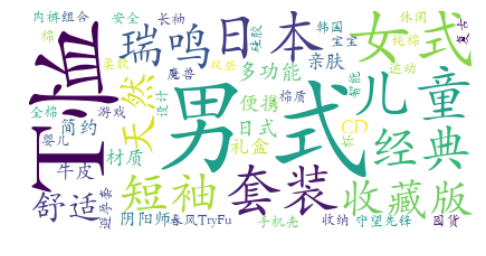

In [20]:
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

plt.figure(figsize=(8,8))

pic = plt.imread('netease.png')
w_c = WordCloud(font_path='STKAITI.TTF', background_color='white', max_font_size=100, margin=1)
wc = w_c.fit_words({x[0]:x[1] for x in word_count.head(50).values})

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [21]:
word_count.head(50)

,word,count
0,男式,137
1,T恤,130
2,女式,123
3,儿童,115
4,日本,103
5,套装,99
6,经典,75
7,瑞鸣,72
8,短袖,71
9,收藏版,71
